# Multi-computation with field change

In [ ]:
from trustutils import run

run.introduction("Pierre Ledac")
run.description("**Champ_parametrique** field for chaining different scenarios in a single *datafile*. \
One stationary then one transitory computation are run and compared to one simulation running the two computations. \
Each computation # is run into a **dedicated directory** named calcul# with **time reset to 0**")
run.TRUST_parameters("1.9.4")

## Introduction 
 Validation made by : Pierre Ledac



 Report generated 07/05/2024

### Description 
**Champ_parametrique** field for chaining different scenarios in a single *datafile*. One stationary then one transitory computation are run and compared to one simulation running the two computations. Each computation # is run into a **dedicated directory** named calcul# with **time reset to 0**

### TRUST parameters 
 * Version TRUST: 1.9.4
 * Binary used: /export/home/catA/pl254994/trust/next_portable/exec/TRUST_mpi_opt (built in directory /export/home/catA/pl254994/trust/next_portable/Validation/Rapports_automatiques/Verification/Champs/Champ_parametrique/build)

In [ ]:
from trustutils import run 
import os
jdd="cp"
cases=[
    (jdd, "champ_parametrique", "champ_parametrique { fichier champ.txt }"),
    ("calcul1", "stationary",   "Champ_Fonc_MED { use_existing_domain file puissance.med domain dom field TEMPERATURE_ELEM_dom loc elem last_time }"),
    ("calcul2", "transient",    "Champ_Fonc_MED_Table_Temps { \
        table_temps { 5 \
                      0.0 1.0 2.0 3.0 4.0 \
                      1.0 0.9 0.6 0.3 0.2 } \
        use_existing_domain file puissance.med domain dom field TEMPERATURE_ELEM_dom loc elem time 0. } ")
]
#    
run.reset()
run.initCaseSuite()
run.executeCommand("echo { > champ.txt")
separateur=""
# Create test case:
for case,label,syntax in cases:
    if label=="champ_parametrique":
       rep="."
    else:
       rep=case
       # Build champ.txt file containing the list of fields (stationary then transient):
       run.executeCommand("echo -e %s %s >> champ.txt" % (separateur, syntax), verbose=False)
       separateur=","
    run.executeCommand("rep=%s;case=%s;mkdir -p $rep;cp base.data $rep/$case.data;cp puissance.med $rep;cp verifie $rep/post_run" % (rep,case), verbose=False)
    cas = run.addCase(rep ,"%s.data" % case) 
    cas.substitute("_champ_",syntax)

run.executeCommand("echo } >> champ.txt")
run.printCases()
run.runCases()

### Test cases 
* ./cp.data 
* calcul1/calcul1.data 
* calcul2/calcul2.data 


Running ...
  => A total of 3 cases were (successfully) run in 1.3s.


## Check results
### The computation (single or multi) should converge to same value

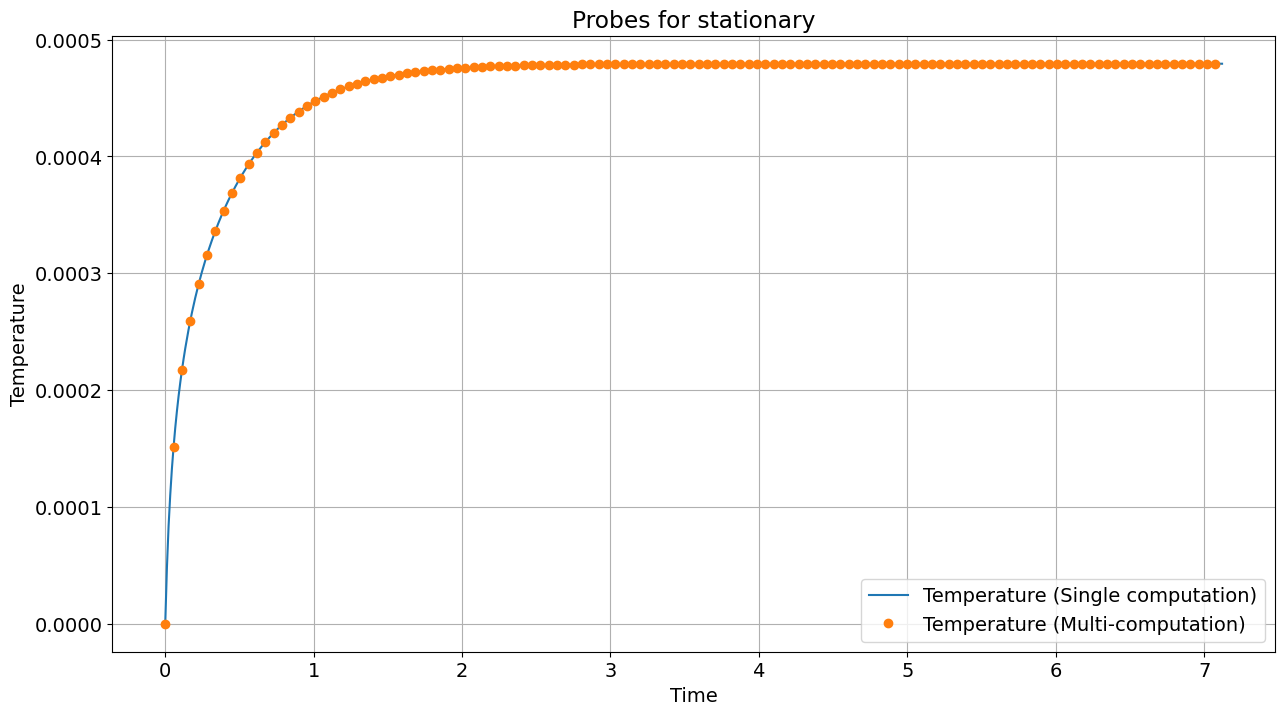

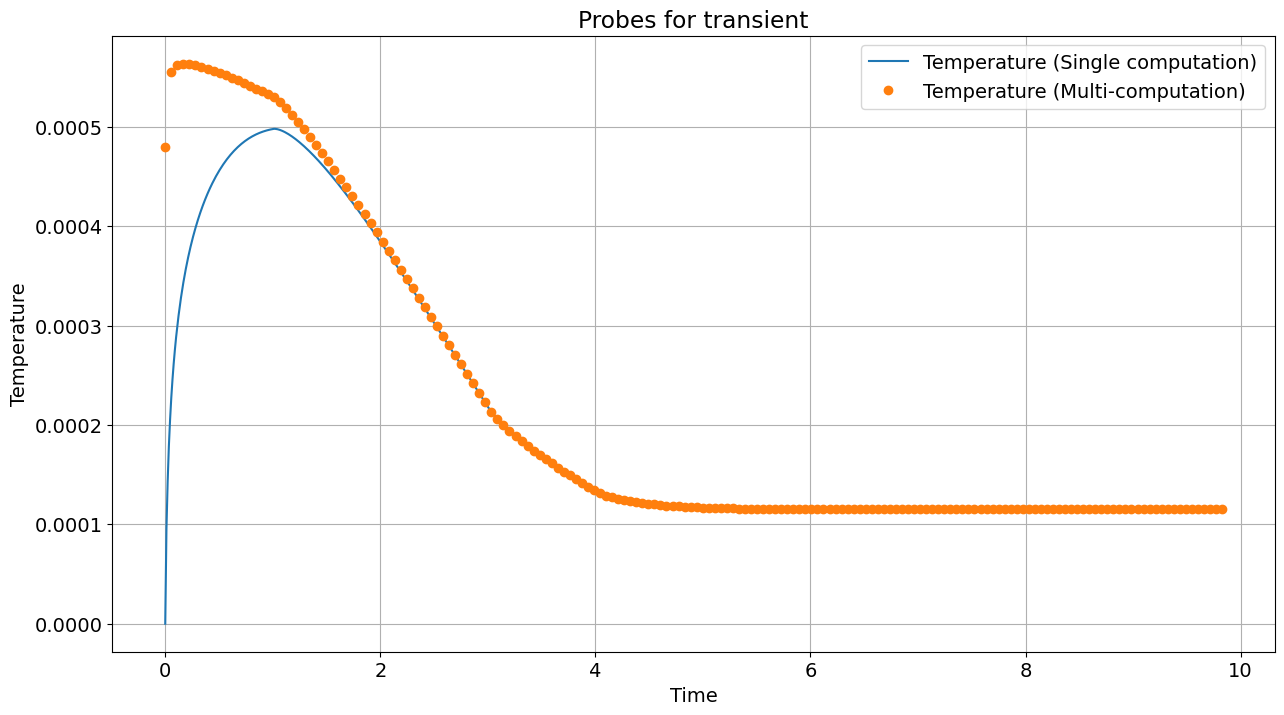

In [ ]:
from trustutils import plot 
import numpy as np
import matplotlib.pyplot as plt 
jdd="cp"
for case,label,syntax in cases:
    if label!="champ_parametrique":
        a=plot.Graph("Probes for %s" % label,size=[15,8])
        a.addPoint("%s/%s_T.son"  % (case,case), marker='-', label="Temperature (Single computation)")
        a.addPoint("%s/%s_T.son"  % (case,jdd) , marker='o', markevery=5, label="Temperature (Multi-computation)")
        a.label("Time","Temperature")